Veer Khosla

Fall 2023

CS 251: Data Analysis and Visualization

Project 1: Data Analysis and Visualization

**Week 2: Start this after Week 2 lab (Lab 1b)**

## Task 2: Update `Data` class for data selection

You will update `Data` to allow the user to select one or more data variables based on their string name. This will give you some practice working with numpy basics.

Implement the following methods in `Data`:
- `get_all_data()`
- `head()`: Return the 1st five data samples (all variables)
- `tail()`: Return the last five data samples (all variables)
- `limit_samples(self, start_row, end_row)`: Update the data so that the object only stores the samples in the contiguous range `[start_row, end_row)`.
- `select_data(headers, rows=[])`: Return data samples corresponding to the variable names in `headers`. If `rows` is empty, return all samples, otherwise return samples at the indices specified by the `rows` list.

In [ ]:
from data import Data
import numpy as np

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 2a. Test `get_all_data`

#### (i) Basic test

In [ ]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
dat = iris_data.get_all_data()
dat[0,:] = -9999
new_dat = iris_data.get_all_data()
if new_dat[0, 0] == -9999.:
    print('!!You did not return a copy of your data!!\n')
else:
    print('get_all_data seems ok!')

#### (ii) Test with passing ndarray into constructor

In [ ]:
test_ii = np.arange(12).reshape([3, 4])
test_ii_data = Data(data=test_ii)
test_ii_data_get = test_ii_data.get_all_data()
print(f'After passing in test data ndarray into your Data object, the data returned is:\n{test_ii_data_get}')
print('It should be:')
print('''[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]''')


### 2b. Test `head` and `tail`

#### (i) Iris

In [ ]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
print(f'Your Iris head (shape={iris_data.head().shape}) is:\n{iris_data.head()}')
print(f'Your Iris tail (shape={iris_data.head().shape}) is:\n{iris_data.tail()}')

You should see:

    Your Iris head (shape=(5, 5)) is:
    [[5.1 3.5 1.4 0.2 0. ]
    [4.9 3.  1.4 0.2 0. ]
    [4.7 3.2 1.3 0.2 0. ]
    [4.6 3.1 1.5 0.2 0. ]
    [5.  3.6 1.4 0.2 0. ]]
    Your Iris tail (shape=(5, 5)) is:
    [[6.7 3.  5.2 2.3 2. ]
    [6.3 2.5 5.  1.9 2. ]
    [6.5 3.  5.2 2.  2. ]
    [6.2 3.4 5.4 2.3 2. ]
    [5.9 3.  5.1 1.8 2. ]]

#### (ii) Data with small number of samples

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)
print(f'Your test head (shape={test_data.head().shape}) is:\n{test_data.head()}')
print(f'Your test tail (shape={test_data.tail().shape}) is:\n{test_data.tail()}')

You should see:

    Your test head (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]
    Your test tail (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]

### 2c. Test `limit_samples`

In [ ]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_data.limit_samples(50, 100)
print(f'After limiting samples, your test head is:\n{iris_data.head()}')
print(f'After limiting samples, your test tail is:\n{iris_data.tail()}')

You should see:

    After limiting samples, your test head is:
    [[7.  3.2 4.7 1.4 1. ]
    [6.4 3.2 4.5 1.5 1. ]
    [6.9 3.1 4.9 1.5 1. ]
    [5.5 2.3 4.  1.3 1. ]
    [6.5 2.8 4.6 1.5 1. ]]
    After limiting samples, your test tail is:
    [[5.7 3.  4.2 1.2 1. ]
    [5.7 2.9 4.2 1.3 1. ]
    [6.2 2.9 4.3 1.3 1. ]
    [5.1 2.5 3.  1.1 1. ]
    [5.7 2.8 4.1 1.3 1. ]]

### 2d. Test `select_data`

#### (i) Test data with spaces

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

one = test_data.select_data(['spaces'])
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'])
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

You should see:

    All data in the "spaces" variable (shape=(3, 1)): 
    [[ 2.]
     [ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(3, 2)): 
    [[ 2.  4.]
     [ 6.  8.]
     [10. 12.]]

#### (ii) Test data with spaces, some samples

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [1, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'], rows=rows)
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(2, 2)): 
    [[ 6.  8.]
     [10. 12.]]

#### (iii) Test data with spaces, non-contiguous samples

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [0, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['bad', 'places'], rows=rows)
print(f'All data in the "bad" and "places" variables (shape={two.shape}): \n{two}')

You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 2.]
    [10.]]
    All data in the "bad" and "places" variables (shape=(2, 2)): 
    [[ 3.  4.]
    [11. 12.]]

## Task 3: `Analysis` class

In this task, you will implement the `Analysis` class that analyzes and visualizes complex datasets comprised of many variables. After creating `Analysis`, you’ll use it alongside your `Data` class to analyze an open-access scientific dataset. *Can you use the tools you’ve developed to extract real-world truths from data?*

You will build on this object-oriented approach to do advanced data analysis in future projects, making it easier for you to apply the tools you develop this week to a wide range of datasets.

It is crucial for your success in CS251 to become fluent in the **vectorization** of matrix operations (**NO LOOPS**) with Numpy and the visualization of data with Matplotlib. We will use these Python packages each and every week. Please bring your questions to class and office hours so that we can help you get comfortable with these essential tools before the math gets more complex and interesting.

In method docstrings that state that loops are not allowed, **we will take off points for every loop that we see — vectorized computations only in analysis functions!** You may use loops in plotting-related methods.

**TODO:**
- Download the `analysis.py` code template.

### Analysis and summary statistic methods

To actually perform computations on data, you will implement the following methods in `analysis.py`, modeled off of common functions in the `pandas` python package (https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html) that we will adopt later in the semester:

- `set_data(data)`
- `min(headers, rows=[])`: Computes the minimum of each variable in `headers` in the data object. Possibly only in a subset of data samples (`rows`) if `rows` is not empty.
- `max(headers, rows=[])`: Computes the maximum of each variable in `headers` in the data object.
- `range(headers, rows=[])`: Computes the range [min, max] for each variable in `headers` in the data object.
- `mean(headers, rows=[])`: Computes the mean for each variable in `headers` in the data object. Equation for mean: $$\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$ where $x_i$ is the $i^{th}$ data sample and $N$ is the total number of data samples in the dataset.
- `var(headers, rows=[])`: Computes the variance for each variable in `headers` in the data object. Equation for sample variance: $$s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.
- `std(headers, rows=[])`: Computes the standard deviation for each variable in `headers` in the data object. Equation for sample standard deviation: $$s^2 = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2}$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.

In [ ]:
from analysis import Analysis


iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
an = Analysis(iris_data)

#### (i) Test `min`

In [ ]:
print(f"Your minimum values for length vars (all samples) are\n{an.min(['sepal_length', 'petal_length'])}\nand should be\n[4.3 1. ]")
print(f"Your minimum values for length vars (1st 10 samples) are\n{an.min(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.4 1.3]")
print(f"Your shape is {an.min(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

#### (ii) Test `range`

In [ ]:
all_mins, all_maxs = an.range(['sepal_length', 'sepal_width'])
some_mins, some_maxs = an.range(['sepal_length', 'sepal_width'], rows=np.arange(10))
print(f"Your range for sepal vars (all samples) is\nmins:{all_mins}\nmaxs:{all_maxs}\nand should be\nmins:[4.3 2. ]\nmaxs:[7.9 4.4]\n")
print(f"Your range for sepal vars (1st 10 samples) is\nmins:{some_mins}\nmaxs:{some_maxs}\nand should be\nmins:[4.4 2.9]\nmaxs:[5.4 3.9]\n")
print(f"Your min shape is {all_mins.shape}\nand should be (2,)")
print(f"Your max shape is {all_maxs.shape}\nand should be (2,)")

#### (iii) Test `mean`

In [ ]:
print(f"Your mean values for length vars (all samples) are\n{an.mean(['sepal_length', 'petal_length'])}\nand should be\n[5.84333333 3.758     ]")
print(f"Your mean values for length vars (1st 10 samples) are\n{an.mean(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.86 1.45]")
print(f"Your shape is {an.mean(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

#### (iv) Test `var`

In [ ]:
print(f"Your variance values for all vars (all samples) are\n{an.var(an.data.get_headers()[:-1])}\nand should be\n[0.68569351 0.18997942 3.11627785 0.58100626]")
print(f"Your variance values for all vars (1st 10 samples) are\n{an.var(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.08488889 0.09433333 0.01166667 0.00622222]")

#### (v) Test `std`

In [ ]:
print(f"Your stdev values for all vars (all samples) are\n{an.std(an.data.get_headers()[:-1])}\nand should be\n[0.82806613 0.43586628 1.76529823 0.76223767]")
print(f"Your stdev values for all vars (1st 10 samples) are\n{an.std(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.29135698 0.30713732 0.10801234 0.07888106]")

## Task 4: Data visualization with matplotlib

In this task, you will create some plots to practice using matplotlib. You will write several functions to make some kinds of plots that will come up frequently in the coming weeks.

In [ ]:
import matplotlib.pyplot as plt

### 4a. Join data with a smooth curve

In the cell below, create a single plot of the functions $sin(x)$, $sin(x)^3$, and $sin(x)^5$ in different colors in the range [-6.28, 6.28]. Points should be connected with a smooth curve in each case. Plug in more than 50 x values otherwise your curves will look jagged.

Your plots should be "high quality", which means that they should contain:
- a helpful title
- clearly differentiated curve colors. **Do not use the default colors, pick your own colors.**
- a legend showing which color scales map onto which curves
- only the x tick marks -6.28, -3.14, 0, +3.14, +6.28
- only the y tick marks -1, 0, +1
- there should be no garbage text output below, just the plot

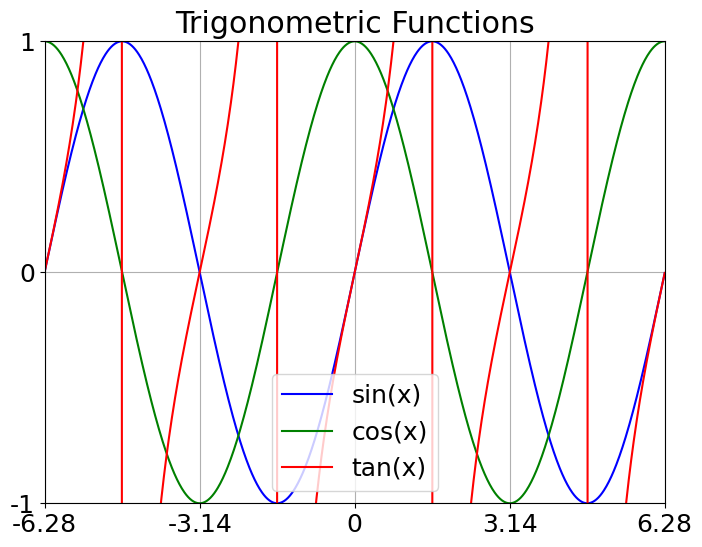

In [22]:
# Generate x values
x = np.linspace(-6.28, 6.28, 1000)  # More than 50 x values for smooth curves

# Calculate y values for sin(x), cos(x), and tan(x)
y_sin = np.sin(x)
y_cos = np.cos(x)
y_tan = np.tan(x)

# Create the plot
plt.figure(figsize=(8, 6))  # Adjust figure size for "high quality" plot
plt.plot(x, y_sin, label='sin(x)', color='blue')
plt.plot(x, y_cos, label='cos(x)', color='green')
plt.plot(x, y_tan, label='tan(x)', color='red')

# Set axis limits and ticks
plt.xlim(-6.28, 6.28)
plt.ylim(-1, 1)
plt.xticks([-6.28, -3.14, 0, 3.14, 6.28], ['-6.28', '-3.14', '0', '3.14', '6.28'])
plt.yticks([-1, 0, 1], ['-1', '0', '1'])

# Add title and legend
plt.title('Trigonometric Functions')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

### 4b. Anscombe's Quartet: Create a 2x2 grid of plots 

In the cell below, create a SINGLE figure with four *scatter plots* in it (2 rows, 2 columns). This should leverage matplotlib's `subplots` function and create ONE cell output (not 4).

1. You are plotting the data in `anscombe.csv`: The first set of points should be plotted on the top-left (row indices 0-10), the second set should be on the top-right (row indices 11-21), the third set should be on the bottom-left (row indices 22-32), and the last set on the bottom-right (row indices 33-43).
2. Make the markers in each subplot a different shape for fun.
3. You should not have connected curves in these plots.
4. The x/y plot limits should the same in all plots (and include all data samples).
5. You should label your axes.

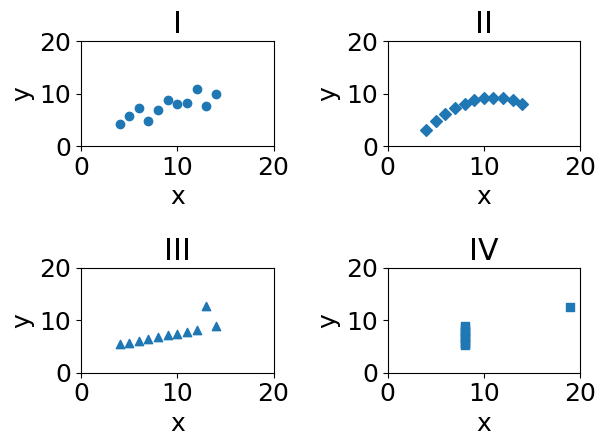

In [23]:
# Load the data using NumPy
data = np.genfromtxt('data/anscombe.csv', delimiter=',', skip_header=2, dtype=None, encoding='utf-8', names=('dataset', 'x', 'y'))

# Create dictionaries to store x and y values for the four datasets
x_data = {dataset: [] for dataset in data['dataset']}
y_data = {dataset: [] for dataset in data['dataset']}

for row in data:
    dataset_label = row['dataset']  # No need to decode, it's already a string
    x_data[dataset_label].append(row['x'])
    y_data[dataset_label].append(row['y'])

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2)

# Define different shapes for markers
markers = ['o', 'D', '^', 's']

# Plot the data
for i, (dataset, ax) in enumerate(zip(x_data.keys(), axes.flatten())):
    ax.scatter(x_data[dataset], y_data[dataset], marker=markers[i])
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(f'{dataset}')

plt.tight_layout()
plt.show()


### 4c. `scatter` method in `Analysis`

Scatter plots will come up a lot in this course. Fill in the `scatter` method in the `Analysis` class to automate the process of selecting (x, y) data from a dataset, creating a scatter plot, labeling axes, and labeling the plot with a title.

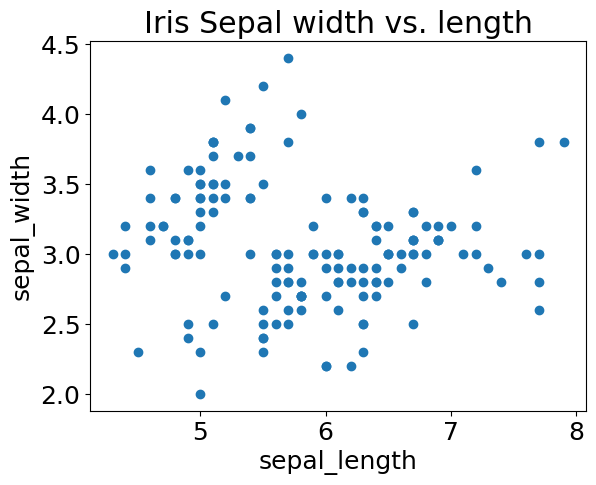

Your x sample shape is (150, 1) and should be (150,) or (150, 1)
Your y sample shape is (150, 1) and should be (150,) or (150, 1)


In [24]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_an = Analysis(iris_data)

x_samps, y_samps = iris_an.scatter('sepal_length', 'sepal_width', 'Iris Sepal width vs. length')
iris_an.show()

print(f'Your x sample shape is {x_samps.shape} and should be (150,) or (150, 1)')
print(f'Your y sample shape is {y_samps.shape} and should be (150,) or (150, 1)')

### 4d. `pair_plot` method in `Analysis`

When doing exploratory data analysis, it is often helpful to create scatter plots of all pairs of variables to visually discover relationships and develop hypotheses to explore quantitatively. For example, if we have variables A, B, C, we would create scatter plots (x=A, y=B), (x=A, y=C), (x=B, y=C). A grid of subplots showing all these scatter plots is called a **pair plot**. If there are $M$ variables, then the grid of plots is $M\times M$.

- In `Analysis`, implement `pair_plot` and test your implementation below on the Iris data.
    - The y axis of the FIRST column should be labeled with the appropriate variable being plotted there.
    - The x axis of the LAST row should be labeled with the appropriate variable being plotted there.
    - Only label the axes and ticks on the FIRST column and LAST row. There should be no labels on other plots (it looks too cluttered otherwise!).
    - Do have tick MARKS on all plots (just not the labels).

Your plot on the bottom-left should look like:

<div>
<center><img src="attachment:c2d66c99-9633-417c-83f4-5f2961a78776.png" width="200"/></center>
</div>

Do you have a 5x5 grid of plots? True


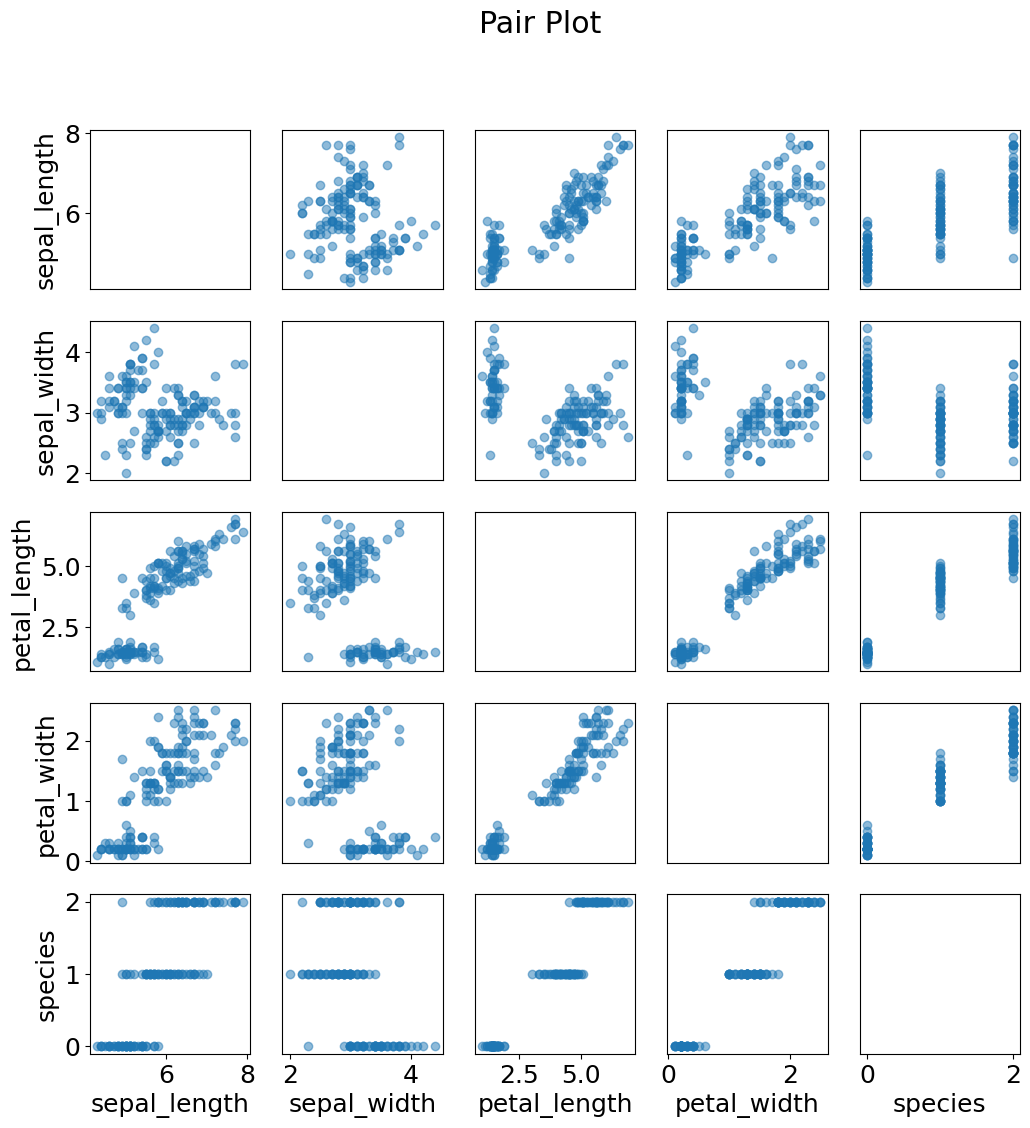

In [25]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_an = Analysis(iris_data)

fig, axes = iris_an.pair_plot(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'], title='Pair Plot')

print(f'Do you have a 5x5 grid of plots? {axes.shape[0] == 5 and axes.shape[1] == 5}')

# Display the plot
plt.show()


## Task 5: Real-world application

Analyze one real-world dataset of your choice: [e.g. wine quality dataset, Old Faithful geyser dataset, Auto MPG dataset, tips dataset]. Use your **existing** visualization and analysis tools to try to learn something about the real world from this dataset (*you can implement other analyses and explore other visualizations as extensions; see below*). 

- Use scatter plot, pair plot, or other visualizations and determine which helps you learn the most about your dataset.
    - Create at least one "good" graph that presents the data in a helpful way and at least one “bad” graph that is not helpful for gleaning insight into your dataset.
- Briefly (but completely) explain your findings in the Markdown cell below alongside well-labeled graphs that support your conclusions. Explain each variable (its units, its range, mean, stdev, what it means about the world).

Monthly Means:
Jan: 13.57
Feb: 15.46
Mar: 25.95
Apr: 38.53
May: 50.73
Jun: 59.96
Jul: 65.48
Aug: 63.42
Sep: 55.35
Oct: 44.61
Nov: 32.62
Dec: 19.42

Monthly Ranges:
Jan: 18.80
Feb: 22.80
Mar: 17.60
Apr: 13.10
May: 13.00
Jun: 10.20
Jul: 9.30
Aug: 11.50
Sep: 10.70
Oct: 15.30
Nov: 14.60
Dec: 26.20

Monthly Standard Deviations:
Jan: 4.45
Feb: 4.41
Mar: 3.82
Apr: 2.42
May: 2.54
Jun: 2.01
Jul: 1.95
Aug: 2.26
Sep: 2.23
Oct: 2.52
Nov: 2.97
Dec: 4.77



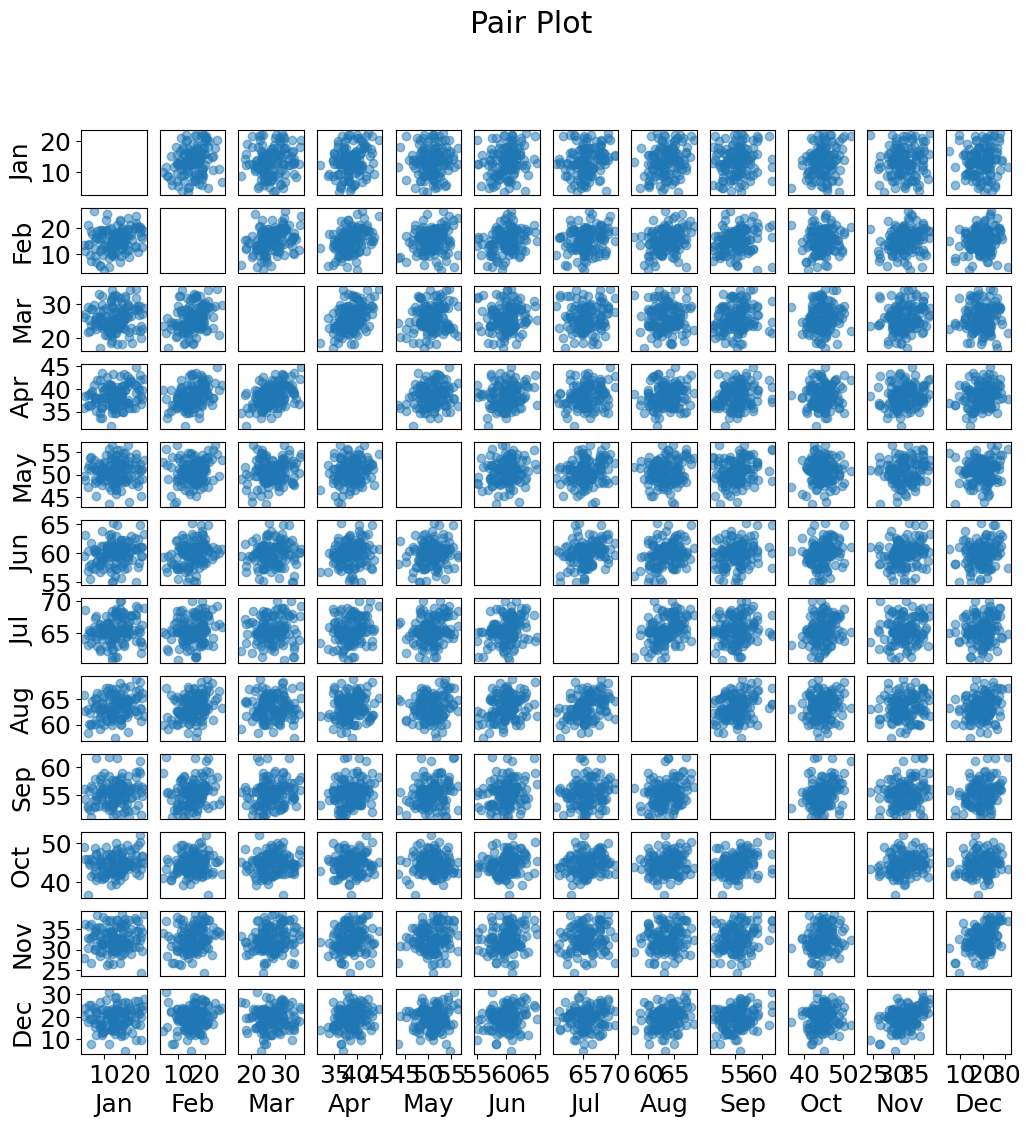

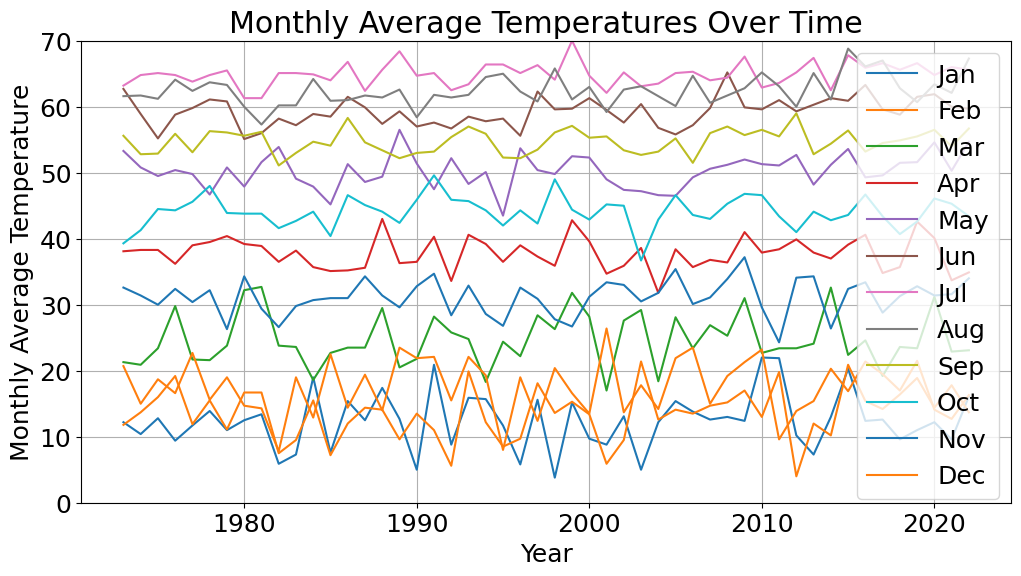

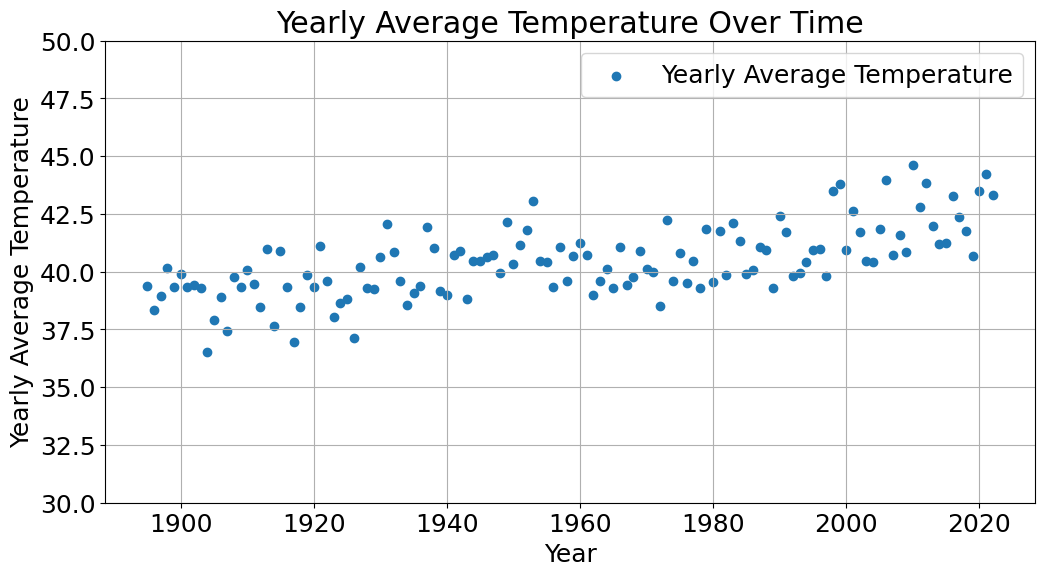

In [28]:
maine_temp_filename = 'data/mainetemps.csv'
maine_temp_data = Data(maine_temp_filename)
maine_temp_an = Analysis(maine_temp_data)

monthly_means = maine_temp_an.monthly_means()
monthly_ranges = maine_temp_an.monthly_ranges()
monthly_stds = maine_temp_an.monthly_stds()

# Format and print the dictionaries
print("Monthly Means:")
print(maine_temp_an.format_dict(monthly_means))

print("Monthly Ranges:")
print(maine_temp_an.format_dict(monthly_ranges))

print("Monthly Standard Deviations:")
print(maine_temp_an.format_dict(monthly_stds))

#Pair Plot
fig, axes = maine_temp_an.pair_plot(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], title='Pair Plot')

# Monthly averages
maine_temp_an.monthly_averages_over_time()

# Yearly averages
maine_temp_an.yearly_average_over_time()



**Explain your findings here:** 

**Bad Graph**: The pair plot is a terrible visualization of the dataset. It is very cluttered, and because it is doing a comparison of each month against every other month, there are 144 plots (12 x 12), making each one very small and difficult to interpret. Additionally, there are so many datapoints on each individual scatter plot, making it difficult to tell what is what. Additionally, there are no differential aesthetics to tell which points are which months.

**Decent Graph**: The monthly average temperatures since 1923. The color aesthetics make it easy to distinguish between the monthly trends. Additionally, it helps us analyze overall monthly trends since 1895. However, the legend covers the most recent years and so it is difficult to exactly see the differences from 2020 onward as compared to earlier years.

**Good Graph**: The yearly average temperatures plot is a good graph. It is easy to read and see how average temperatures are increasing in Maine, over the course of the past century. I limited the y-axis so it is easier to see the changes in temperature. Although it is only a few degrees, this is indicative of global climate problems which we are facing. The upwards trend demonstrates that there is in fact serious climate warming occuring.


**Conclusions**: These visualizations and analyses demonstrate the vast temperature changes that the state of Maine has experienced over time. As illustrated in the graphs above, average yearly temperatures have shown consistent increases over a period of nearly 150 years. The dataset itself encompasses two primary variables: "Year" and "Month" (with 12 levels). "Year" is categorized as a string-number, while "Month" is represented as a string, and holds numeric data signifying the average temperature for a given month and year. Above these graphs are statistics for each month, spanning from 1895 to 2023.

These findings extend beyond the boundaries of Maine and resonate with global climate concerns. The temperature trends observed here mirror broader climate change patterns affecting our planet. As we witness rising temperatures and their far-reaching implications, it becomes ident that:t:
:a
1. The warming trend in Maine is not an isolated occurrence but part of a global phenomenon. As temperatures continue to rise worldwide, we face heightened risks related to extreme weather events, sea-level rise, and environmental disruptions.
2. The increase in temperatures can disrupt ecosystems and biodiversity, potentially leading to species extinction and loss of critical habitats.
3. These trends emphasize the importance of climate adaptation and mitigation efforts, encouraging the development of sustainable practices.).

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. More visualizations

Research and create more visualizations of data. If we haven't talked about it in class, all the better! This could be in the matplotlib API or something you build yourself (probably a better extension).

### 2. More summary statistics

Research, implement, and apply additional ways to quantitatively summarize a dataset. Compare these other techniques with those that you implemented in this project.

### 3. More datasets

Analyze and visualize additional datasets. Document and report on insights/hypothesized relationships that you may have discovered.

### 4. Anscombe's Quartet

Despite the visual dissimilarity of the data samples in each group of points, the groups of data have many identical (or nearly identical) summary statistics! Use you analysis code to verify this. Explain what it means / why it happens. Research additional statistics that are identical in the quartet, then implement and verify their similarity.  

### 5. Filtering dataset by categorical variable.

It is also possible to generate the Anscombe's Quartet plot by taking advantage of the `dataset` categorical variable: only plot samples in a particular subplot panel that have a `dataset` value of either `I`, `II`, `III` or `IV`). In other words, only plot a filtered version of the dataset based on the categorical data value.

As an extension, you can also run analyses after filter other datasets based on categorical data values (e.g. compute the mean of numeric variables that have the same value of a categorical variable).

### 6. Additional data types

You wrote `Data` to only store numeric and categorical data types. Extend your `Data` class to correctly parse and represent dates, strings, and other types of data.

NOTE: You will definitely want to make a copy of your `Data` class before attempting this!